<a href="https://colab.research.google.com/github/Spamziesagcan/Data-Science/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

In [3]:
happy_index = pd.read_csv("oecd_bli_2015.csv", thousands = ",")
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands = ",", delimiter = "\t", encoding = "latin1", na_values = "n/a")

In [8]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]

happy_index = pd.read_csv("oecd_bli_2015.csv", thousands=",")
gdp_per_capita = pd.read_csv("gdp_per_capita.csv", thousands=",", delimiter="\t",
                             encoding="latin1", na_values="n/a")

country_stats = prepare_country_stats(happy_index, gdp_per_capita)
x = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

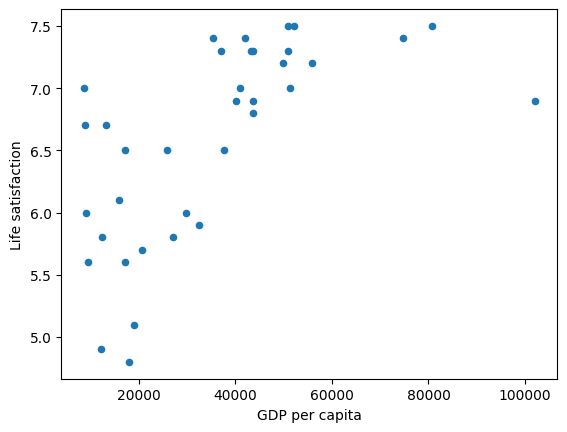

In [9]:
country_stats.plot(kind='scatter', x="GDP per capita", y='Life satisfaction')
plt.show()

In [13]:
lin_reg_model = sklearn.linear_model.LinearRegression()

In [14]:
lin_reg_model.fit(x,y)

LinearRegression()

In [16]:
x_new = [[22587]]
print(lin_reg_model.predict(x_new))

[[6.28653637]]
